In [15]:
%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample_manualmerge.py
##Make frequency and read file, oriented by ancestry (allele in chimp)

import collections
import numpy as np
import sys
import random

moderneas=sys.argv[1]
howmany=int(sys.argv[2])

pD1="/home/mel_yang/projects/bronzeage/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_manualpdeasmerge"
indfilename="ind_A_v13_TBH"
indfile=open(pD1+indfilename+addon+".ind",'r')
pdeasall=[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()

pdeas=sorted(random.sample(pdeasall,howmany))

newfile=open(pD2+indfilename+addon+".pdEAS."+moderneas+".ss"+str(howmany)+".dfreq",'w')
newfile.write(moderneas+".ss"+str(howmany)+'\n')

genofile=open(pD1+indfilename+".geno",'r')
num=0
for line in genofile:
    num+=1
    #if num==10: break
    ancgeno=int(line[ancind])

    easgeno=[int(line[ind]) for ind in pdeas]
    if 9 in easgeno: dfreqs=-5
    else: 
        total=2.0*len(easgeno)
        secondallele=np.sum(easgeno)
        if ancgeno==0: mydfreq=secondallele/total
        elif ancgeno==2: mydfreq=1-(secondallele/total)
        else: print "ancgeno is", ancgeno
        dfreqs=mydfreq
    #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
    newfile.write("%.4f" % dfreqs + '\n')

newfile.close()

Overwriting /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample_manualmerge.py


In [22]:
print ' '.join(["Han_SChina","Han_NChina","Japanese","TibetanSW","Thai_Dai","Kinh_Vietnamese",
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur","Oroqen_Daur_Hezhen","Kazakh"])


Han_SChina Han_NChina Japanese TibetanSW Thai_Dai Kinh_Vietnamese Maonan_Mulam Dong_Gelao She_Miao_Tujia Mongol Xibo_Mongola_Yugur Oroqen_Daur_Hezhen Kazakh


In [23]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/jda/"
##N=24 for ref in Han_SChina Han_NChina Ami_Bunun_Tao Japanese Naxi_Yi TibetanSW TibetanNW TibetanSE Ulchi Thai_Dai Kinh_Vietnamese Maonan_Mulam Dong_Gelao She_Miao_Tujia Mongol Xibo_Mongola_Yugur Zhuang_Li Tu_Salar_Dongxiang Oroqen_Daur_Hezhen Kyrgyz Kazakh Hazara_Uygur; do
for ref in Han_SChina Han_NChina Japanese TibetanSW Thai_Dai Kinh_Vietnamese Maonan_Mulam Dong_Gelao She_Miao_Tujia Mongol Xibo_Mongola_Yugur Oroqen_Daur_Hezhen Kazakh; do
    echo ${ref}
    python ${pd}jda_getpd_dfreq_downsample_manualmerge.py ${ref} 30
done

Han_SChina
Han_NChina
Japanese
TibetanSW
Thai_Dai
Kinh_Vietnamese
Maonan_Mulam
Dong_Gelao
She_Miao_Tujia
Mongol
Xibo_Mongola_Yugur
Oroqen_Daur_Hezhen
Kazakh


In [30]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
addon2="_manualpdeasmerge"
#ss=".ss24"
ss=".ss30"
##N=24 for myref in Han_SChina Han_NChina Ami_Bunun_Tao Japanese Naxi_Yi TibetanSW TibetanNW TibetanSE Ulchi Thai_Dai Kinh_Vietnamese Maonan_Mulam Dong_Gelao She_Miao_Tujia Mongol Xibo_Mongola_Yugur Zhuang_Li Tu_Salar_Dongxiang Oroqen_Daur_Hezhen Kyrgyz Kazakh Hazara_Uygur;
for myref in Han_SChina Han_NChina Japanese TibetanSW Thai_Dai Kinh_Vietnamese Maonan_Mulam Dong_Gelao She_Miao_Tujia Mongol Xibo_Mongola_Yugur Oroqen_Daur_Hezhen Kazakh; 
do
    paste ${pD}jda_anceas${addon}.chrompos ${pD}ind_A_v13_TBH${addon2}.pdEAS.${myref}${ss}.dfreq ${pD}jda_anceas${addon}.readcount > ${pD}jda_anceas${addon}${addon2}_${myref}${ss}.comb 
    head -n1 ${pD}jda_anceas${addon}${addon2}_${myref}${ss}.comb > ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.header
    cat ${pD}jda_anceas${addon}${addon2}_${myref}${ss}.comb | grep -v "-" | grep -v "0.0000" | grep -v "1.0000" | grep -v "5.0000" > ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.comb1
    cat ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.header ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.comb1 > ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.comb
    rm ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.comb1
    rm ${pD}jda_anceas${addon}${addon2}_${myref}${ss}_nomissfixed.header
    rm ${pD}jda_anceas${addon}${addon2}_${myref}${ss}.comb
done

In [28]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_manualmerge.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
addon="_switchanc"
addon2="_manualpdeasmerge"
#ss=".ss24"
ss=".ss30"
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
myrefs=["Han_SChina","Han_NChina","Ami_Bunun_Tao","Japanese","Naxi_Yi", ##N=24
        "TibetanSW","TibetanNW","TibetanSE","Ulchi","Thai_Dai","Kinh_Vietnamese",
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur",
        "Zhuang_Li","Tu_Salar_Dongxiang","Oroqen_Daur_Hezhen","Kyrgyz","Kazakh","Hazara_Uygur"]

myrefs=["Han_SChina","Han_NChina","Japanese","TibetanSW","Thai_Dai","Kinh_Vietnamese", ##N=30
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur","Oroqen_Daur_Hezhen","Kazakh"]

for myref in myrefs:
    freq, reads, inds = parse_reads(pD+"jda_anceas"+addon+addon2+"_"+myref+ss+"_nomissfixed.comb",cutoff=0)
    ##Tonglin, Linzi, XianShang, Yaojia/ZGM, TY, DHG, BLK, XSQ, ZGM
    pops=[[0],[1,6,7],[2,5],[3],[4],[8],[9,10,11,12,13,14],[15],[16,17,18],[19,20,21,22]]
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=10,continuity=False)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+addon2+"."+myref+ss+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=10,continuity=True)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+addon2+"."+myref+ss+"_contTrue.pickle","w"))

Overwriting /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_manualmerge.py


False Tonglin 54687.5178631 [0.015658613925339699, 0.14827455210918303, 0.018549848674166546]
True Tonglin 54729.4690401 [0.021227436159201443, 0.013417669236457758]
False Linzi 545849.270898 [0.012074081494258206, 0.016512805534020628, 0.010050073060431855, 0.022571063553432743, 0.0091219726674055309]
True Linzi 545919.50177 [0.017388435460033231, 0.0096698139645604309, 0.021546957701409266, 0.008855405397346576]
False XianShang 77821.2432135 [0.010814715271731978, 0.033612168278572094, 0.02300460907608988, 0.020917280395197867]
True XianShang 77829.0419616 [0.013420137027297212, 0.021644422096052919, 0.019812214408830065]
False Yaojia 37869.5042167 [1e-10, 9.9924474377565904, 0.063701060796406903]
True Yaojia 37467.2898281 [0.014152389605601426, 0.015913587434072951]
False ZGM 326713.478986 [0.014592122014506437, 0.0046265413170716403, 0.0067650192387395808]
True ZGM 326714.815836 [0.015163890346082976, 0.0067349501363131109]
False TY 451199.378795 [0.081704048875533467, 0.1369610049

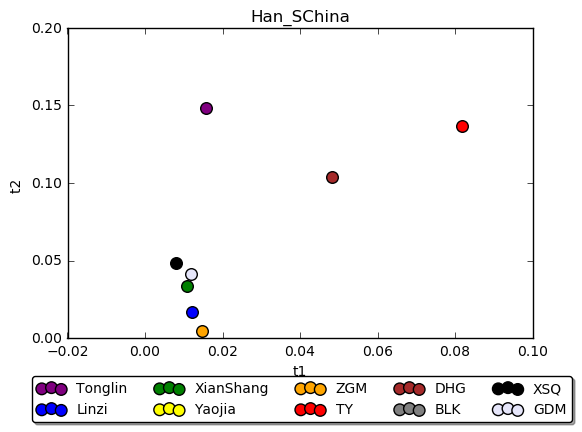

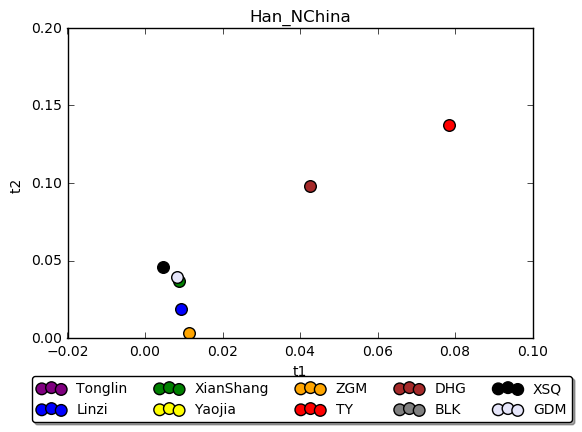

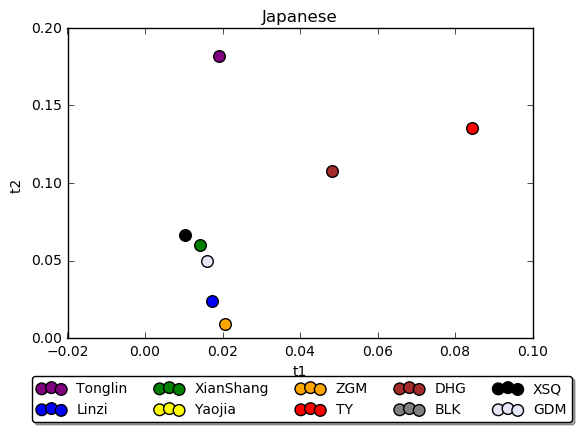

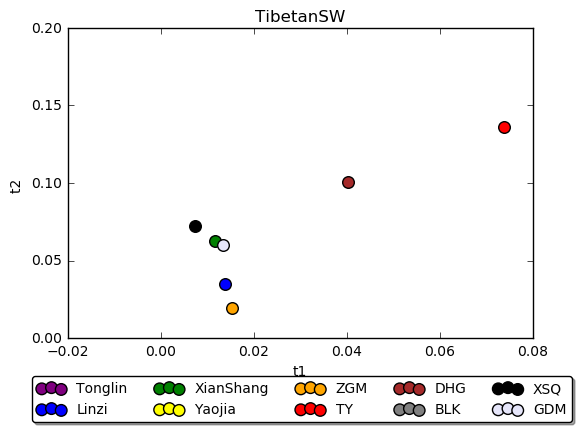

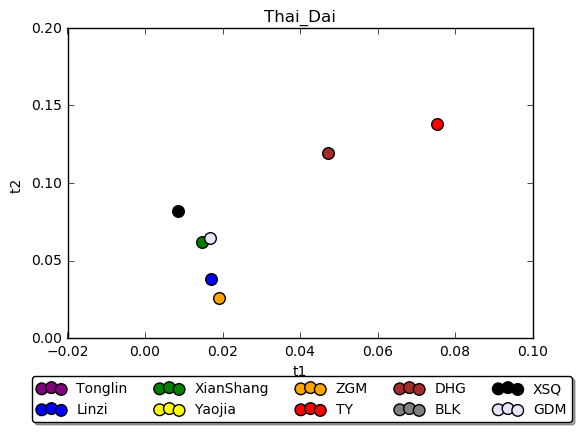

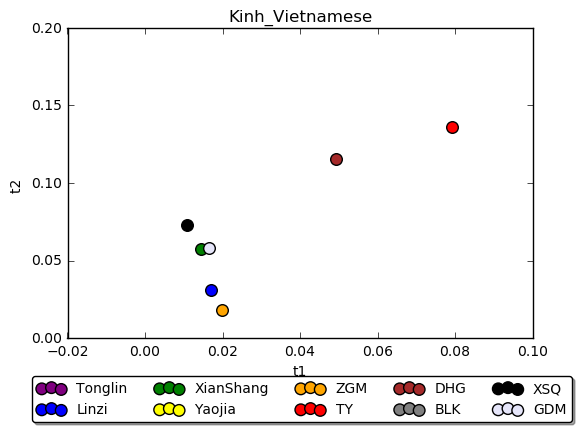

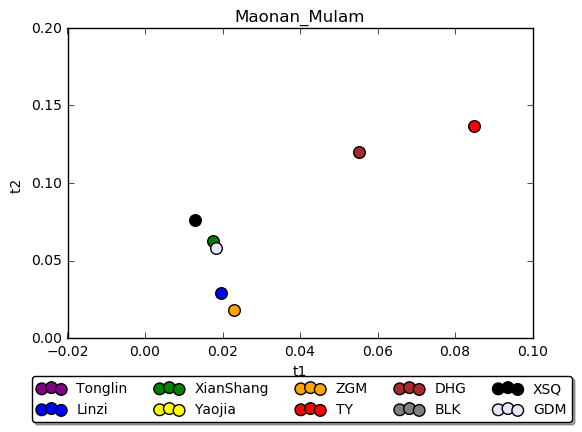

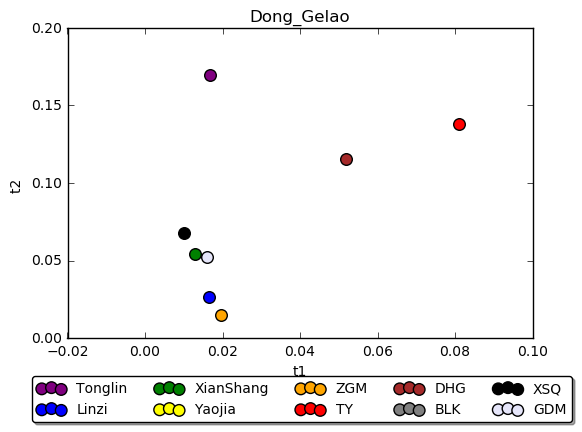

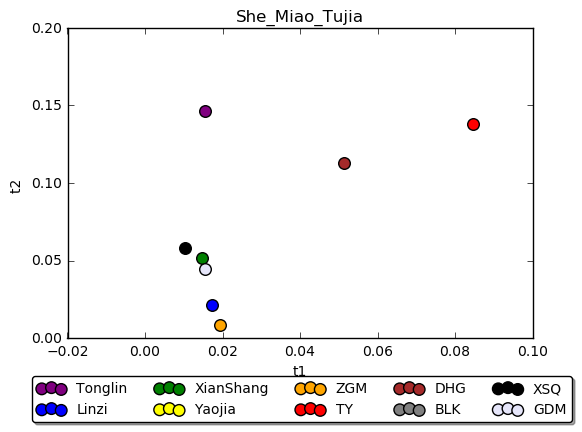

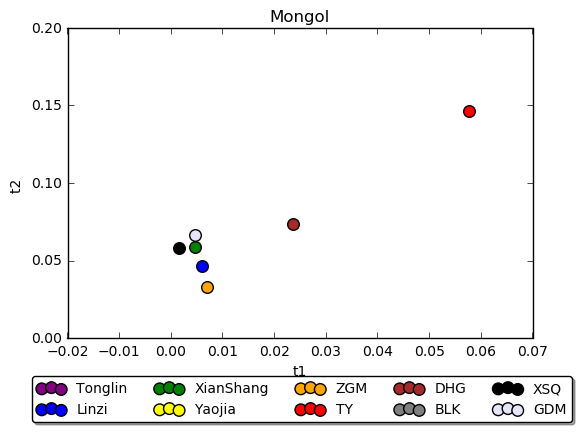

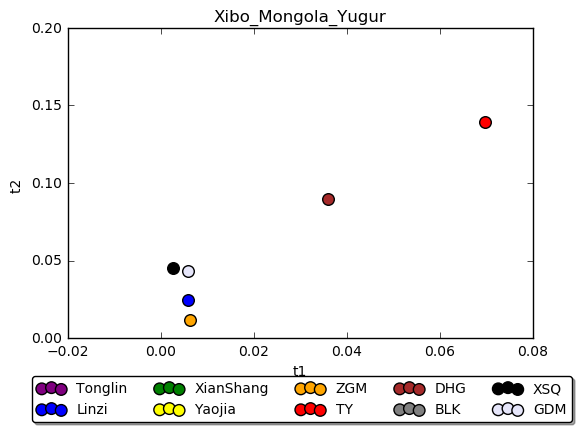

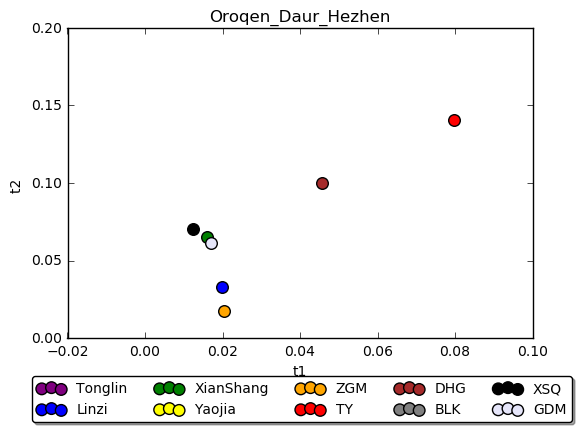

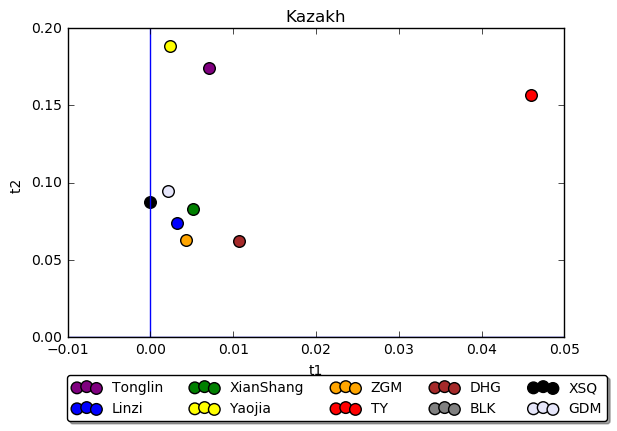

In [31]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
addon2="_manualpdeasmerge"
ss=".ss24"
colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue"]
myrefs=["Han_SChina","Han_NChina","Japanese","TibetanSW","Thai_Dai","Kinh_Vietnamese", ##N=30
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur",
        "Oroqen_Daur_Hezhen","Kazakh"] ##13 popns
myrefs=["Han_SChina","Han_NChina","Ami_Bunun_Tao","Japanese","Naxi_Yi", ##N=24
        "TibetanSW","TibetanNW","TibetanSE","Ulchi","Thai_Dai","Kinh_Vietnamese", ##22 popns
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur",
        "Zhuang_Li","Tu_Salar_Dongxiang","Oroqen_Daur_Hezhen","Kyrgyz","Kazakh","Hazara_Uygur"]
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK","XSQ","GDM"] 
popiwant="TY"

for refpop in myrefs:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for myind,popiwant in enumerate(mypops):
        t1f,t2f,t1t,t2t=[],[],[],[]

        #print "_______________________"
        #print refpop
        falsefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat

        for ind,mypop in enumerate(falsedat):
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                print "False", mypops[ind],mypop[1], list(mypop[0])
                print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])
                #print popiwant, mypop[0][0], mypop[0][1]
        i=0
        ax.scatter(t1f[i],t2f[i],label=mypops[myind],c=colors[myind],s=70)
        ax.set_title(refpop)
        #ax.set_xlim((0,0.13))
        ax.set_ylim((0,0.2))
        ax.set_xlabel("t1")
        ax.set_ylabel("t2 ")
        ax.legend(fontsize=10,bbox_to_anchor=(1.1, -0.1),ncol=5, fancybox=True, shadow=True)
ax.axhline(y=0)
ax.axvline(x=0)
fig.tight_layout()

22


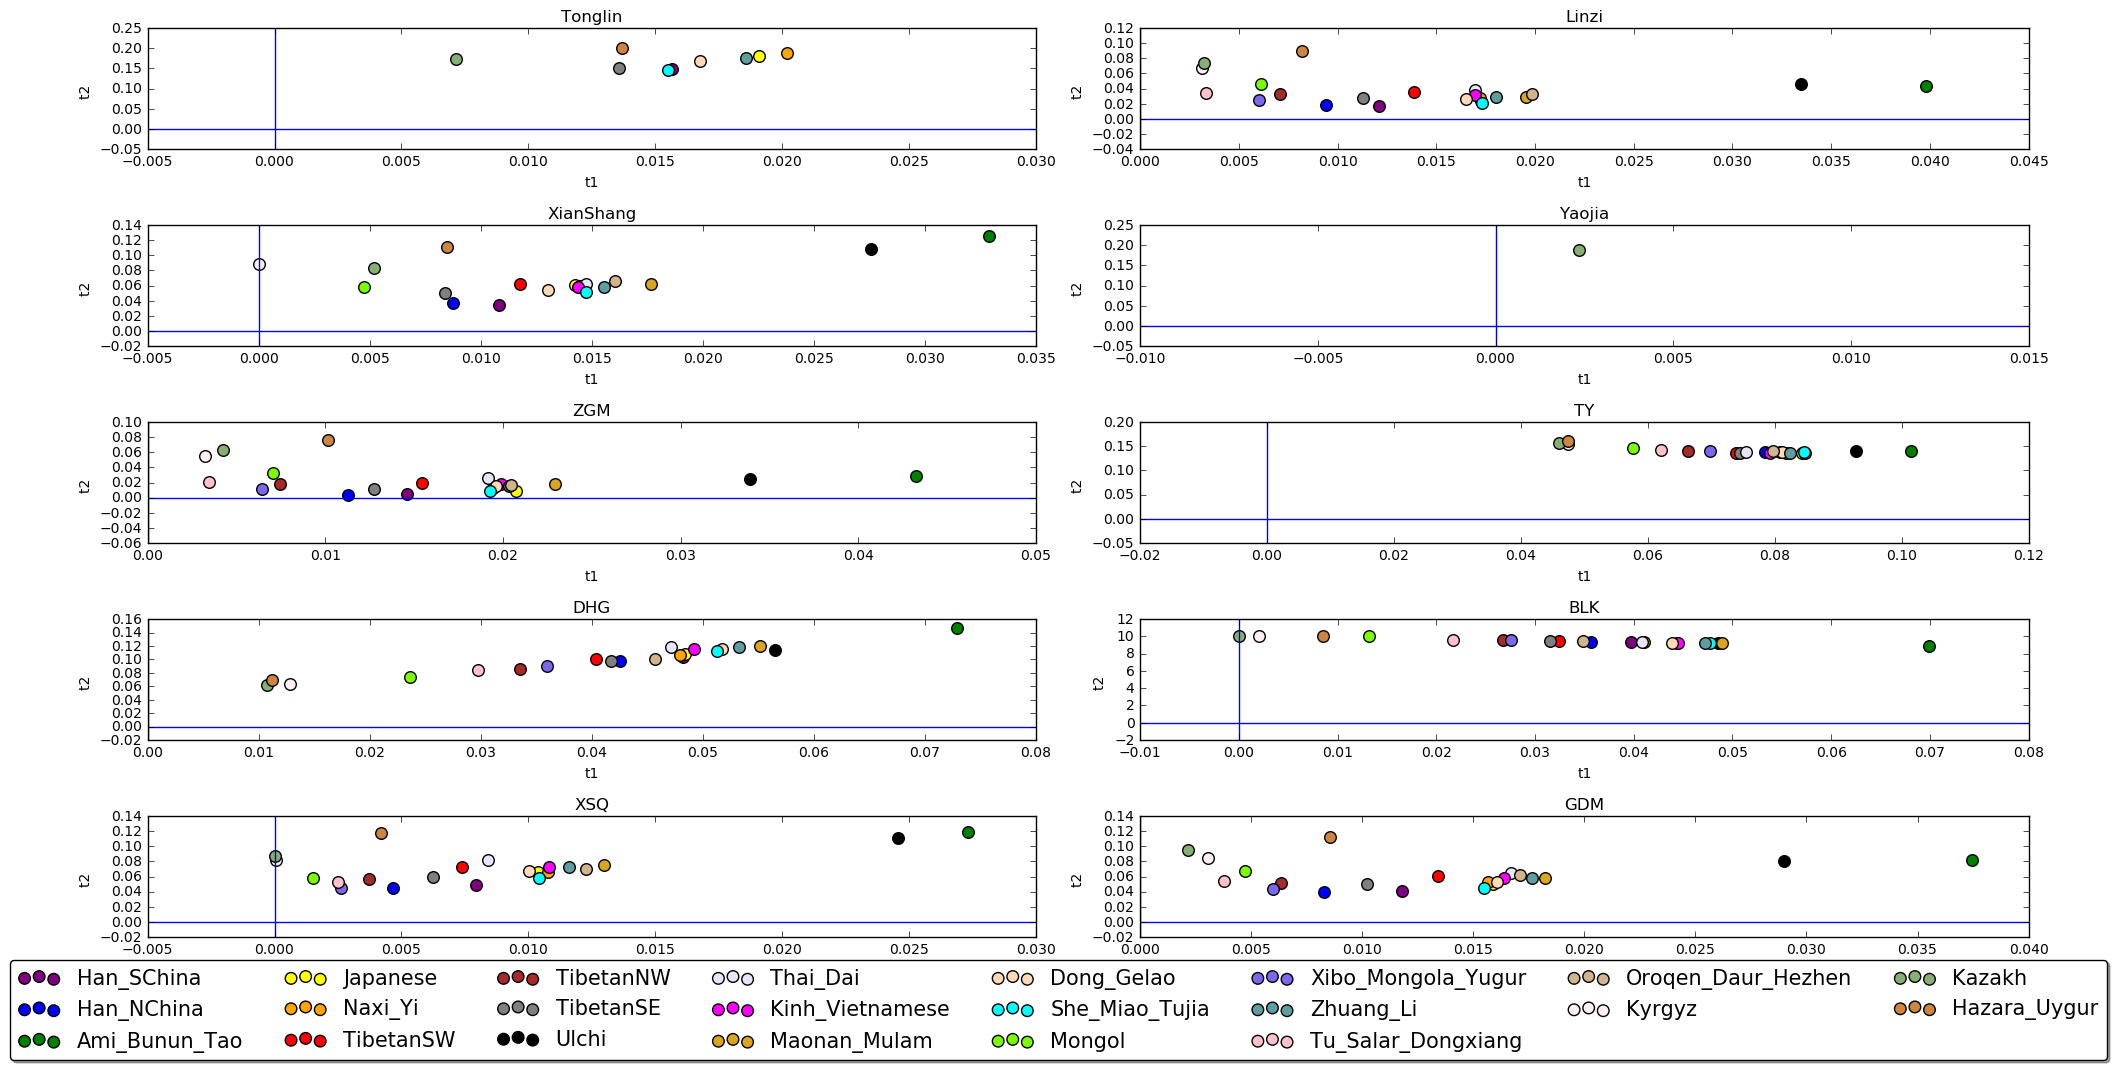

In [65]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
addon2="_manualpdeasmerge"
ss=".ss24"
colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue"]
refpops=["Han_SChina","Han_NChina","Japanese","TibetanSW","Thai_Dai","Kinh_Vietnamese", ##N=30
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur","Oroqen_Daur_Hezhen","Kazakh"]
refpops=["Han_SChina","Han_NChina","Ami_Bunun_Tao","Japanese","Naxi_Yi", ##N=24
        "TibetanSW","TibetanNW","TibetanSE","Ulchi","Thai_Dai","Kinh_Vietnamese", ##22 popns
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur",
        "Zhuang_Li","Tu_Salar_Dongxiang","Oroqen_Daur_Hezhen","Kyrgyz","Kazakh","Hazara_Uygur"]

#refpops=["Han_HGDP"]
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK","XSQ","GDM"]
popiwant="TY"
fig = plt.figure(figsize=(20,10))
for myind,popiwant in enumerate(mypops):
    #if myind>5: continue
    ax = fig.add_subplot(5,2,myind+1)
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        #print "_______________________"
        #print refpop
        falsefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat

        for ind,mypop in enumerate(falsedat):
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                #print "False", mypops[ind],mypop[1], list(mypop[0])
                #print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    for i in range(len(t1f)):
        if popiwant != "BLK":
            if t1f[i]>5 or t2f[i]>5: continue
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
    
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax.set_title(popiwant)
    ax.set_xlabel("t1")
    ax.set_ylabel("t2 ")
    ax.axhline(y=0)
    ax.axvline(x=0)
ax.legend(fontsize=15,bbox_to_anchor=(1.1, -0.1),ncol=8, fancybox=True, shadow=True)
fig.tight_layout()

22


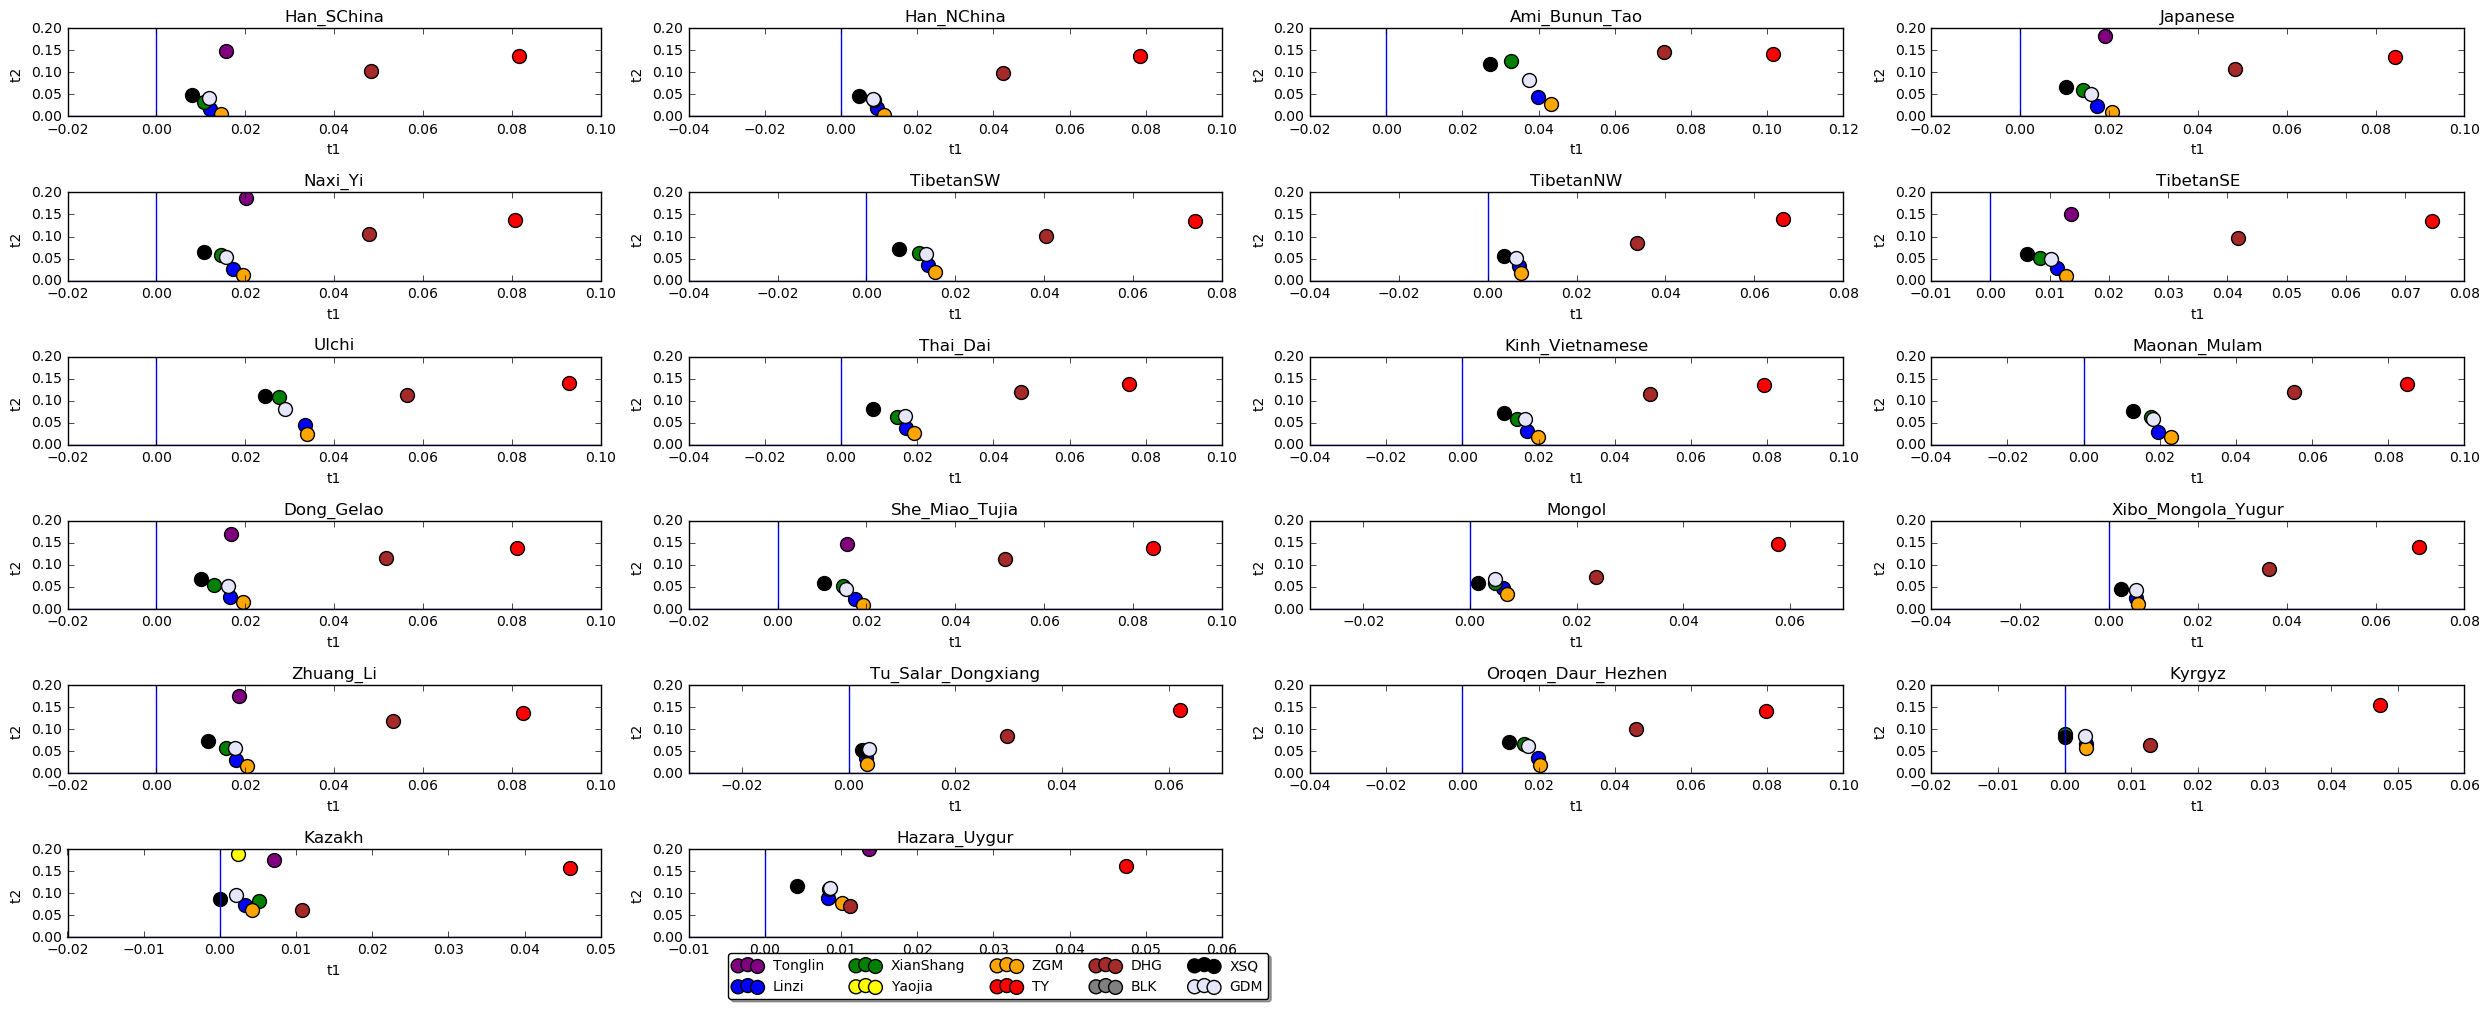

In [67]:
%matplotlib inline
##Plot figure for each reference, showing all ancient
import cPickle
import numpy as np
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
addon2="_manualpdeasmerge"
ss=".ss24"
colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue"]
refpops=["Han_SChina","Han_NChina","Japanese","TibetanSW","Thai_Dai","Kinh_Vietnamese", ##N=30
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur","Oroqen_Daur_Hezhen","Kazakh"]
refpops=["Han_SChina","Han_NChina","Ami_Bunun_Tao","Japanese","Naxi_Yi", ##ss=24
        "TibetanSW","TibetanNW","TibetanSE","Ulchi","Thai_Dai","Kinh_Vietnamese", ##N=22 popns
         "Maonan_Mulam","Dong_Gelao","She_Miao_Tujia","Mongol","Xibo_Mongola_Yugur",
        "Zhuang_Li","Tu_Salar_Dongxiang","Oroqen_Daur_Hezhen","Kyrgyz","Kazakh","Hazara_Uygur"]

print len(refpops)
refpop="Japanese"
myreps=100
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK","XSQ","GDM"]
newfile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+".results.txt",'w')
newfile.write("Ref\tAnc\tt1\tt2\tFalse\tTrue\n")
fig = plt.figure(figsize=(25,10))
for ind,refpop in enumerate(refpops):
    #print '----------'+refpop+"-----------"
    ax = fig.add_subplot(6,4,ind+1)

    falsefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contFalse.pickle",'r')
    falsedat=cPickle.load(falsefile)
    truefile=open(pD+"ind_A_v13_TBH"+addon+addon2+"."+refpop+ss+"_contTrue.pickle",'r')
    truedat=cPickle.load(truefile)
    falsefile.close()
    truefile.close()
    t1f,t2f,t1t,t2t=[],[],[],[]
    for ind,mypop in enumerate(falsedat):
        #if ind!=4: continue
        newfile.write("%s\t%s\t%.4f\t%.4f\t%.2f\t%.2f\n" % (refpop,mypops[ind],mypop[0][0],mypop[0][1],mypop[1],truedat[ind][1])) 
        t1f.append(mypop[0][0])
        t2f.append(mypop[0][1])
        t1t.append(truedat[ind][0][0])
        t2t.append(truedat[ind][0][1])
        ax.scatter(mypop[0][0],mypop[0][1],label=mypops[ind],c=colors[ind],s=100)

    ax.set_title(refpop)
    #ax.set_xlim((0,0.13))
    ax.set_ylim((0,0.2))
    ax.set_xlabel("t1")
    ax.set_ylabel("t2 ")  
    ax.axhline(y=0)
    ax.axvline(x=0)
ax.legend(fontsize=10,bbox_to_anchor=(1.1, -0.1),ncol=5, fancybox=True, shadow=True)
fig.tight_layout()
newfile.close()